# Prospecção de Dados (Data Mining) DI/FCUL - HA2

## Second Home Assignement (MC/DI/FCUL - 2024)

### Fill in the section below

### GROUP:`###`

* Element Name, Number - Hours worked on the project
* Element Name, Number - Hours worked on the project
* Element Name, Number - Hours worked on the project



## Objectives
The purpose of this Home Assignment is:

1. Analyze the itemset/rules generation procedure
2. Process and identify the most relevant rules

**NOTE 1: Students are not allowed to add more cells to the notebook**

**NOTE 2: The notebook must be submited fully executed**


### 1. Read the Dataset

Dataset: Instacart [Market Basket Analysis](https://www.kaggle.com/datasets/psparks/instacart-market-basket-analysis)



The purpose of this Home Assignment is:

1. Analyze the itemset/rules generation procedure
2. Identify the most relevant rules

Please download the HA files from this moodle folder and inspect it like this:

**NOTE 1: Students are not allowed to add more cells to the notebook**

**NOTE 2: The notebook must be submited fully executed**

The dataset has been preprocessed with transactions as lists of integers. It is necessary a decoder to see the actual products bought together

Uncompress the data set (zip file) which will produce 2 files:
* `order_products.pickle` a Python pickle with all the trasactions
* A `products.txt` - decoder table with all the data relative to each item



In [26]:
#Read product names and IDs
lines=open("products.txt", "rt", encoding="utf8").readlines()
products=[0]*len(lines)
for lin in lines[1:]:
    pid, pname, aid, did=lin.strip().split("\t")    
    products[int(pid)]=pname
    
#read transactions
import pickle
orders=pickle.load(open("order_products.pickle", "rb"))

#check names of products on transaction 2 (example):
print("Transaction 2 is", orders[2])
for prod in orders[2]: print("Code: %5d is product: %s" %(prod, products[prod]))

Transaction 2 is [33120, 28985, 9327, 45918, 30035, 17794, 40141, 1819, 43668]
Code: 33120 is product: Organic Egg Whites
Code: 28985 is product: Michigan Organic Kale
Code:  9327 is product: Garlic Powder
Code: 45918 is product: Coconut Butter
Code: 30035 is product: Natural Sweetener
Code: 17794 is product: Carrots
Code: 40141 is product: Original Unflavored Gelatine Mix
Code:  1819 is product: All Natural No Stir Creamy Almond Butter
Code: 43668 is product: Classic Blend Cole Slaw


### Objective 1 - Analyze the itemset/rules generation procedure

1. From the approaches used in classes make a performance analysis up to a threshold level of support
2. Define a good support threshold for analysis according to your computational capabilities


In [64]:
### Add supporting functions here
from pyfim import pyeclat
import time
from PD_freqitems import freqitemsets
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpgrowth
import pandas as pd
import matplotlib.pyplot as plt

def getTransactions(orders, products):
    return list(map(lambda i: list(map(lambda prod: products[prod], orders[i])), orders.keys()))


def getPerformance(min_support: list, transactions: list, transactions_db: pd.DataFrame) -> dict:
    D={"threshold": min_support, 
        "num_itemsets":[],
        "apriori":[], 
        "FP-growth":[], 
        "ECLAT":[], 
        "PD":[]}
    
    for min_supp in D["threshold"]:
        t0 = time.time()
        FI_apriori=apriori(transactions_db, min_supp)
        t1 = time.time()
        D["num_itemsets"].append(FI_apriori.shape[0])
        D["apriori"].append(t1-t0)

        FI_fpg= fpgrowth(transactions_db, min_supp)
        t2 = time.time()
        D["FP-growth"].append(t2-t1)

        FI_eclat= pyeclat(transactions, min_supp)    
        t3 = time.time()
        D["ECLAT"].append(t3-t2)

        FI_pdfis= freqitemsets(transactions, min_supp)    
        t4 = time.time()
        D["PD"].append(t4-t3)

    return D


C:\Users\romul\AppData\Local\Temp\ipykernel_13836\2065156953.py:7: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  df = pd.DataFrame.sparse.from_spmatrix(trans_array, columns=tr_enc.columns_)


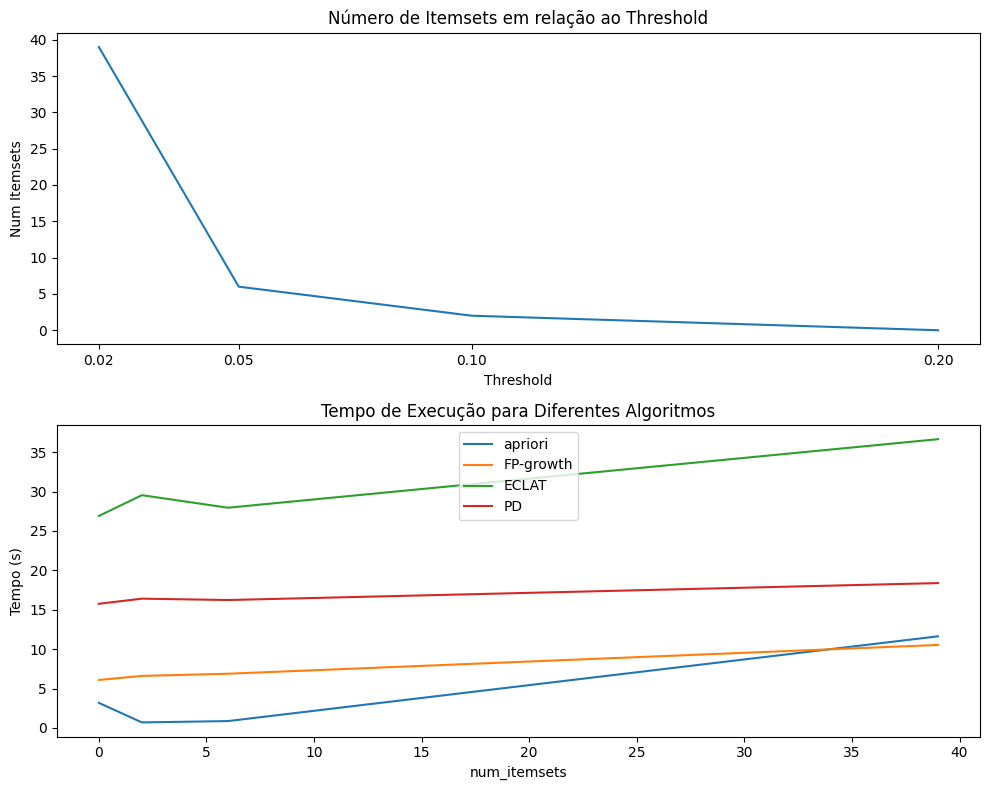

In [69]:
### Add processing code here

transactions = getTransactions(orders, products)

tr_enc = TransactionEncoder()
trans_array = tr_enc.fit(transactions).transform(transactions, sparse=True)
df = pd.DataFrame.sparse.from_spmatrix(trans_array, columns=tr_enc.columns_)

D = getPerformance([0.2, 0.1, 0.05, 0.02], transactions, df)


# Plot dos resultados

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

ax1.plot(D['threshold'], D['num_itemsets'])
ax1.set_xticks(D['threshold'])
ax1.set_xlabel('Threshold')
ax1.set_ylabel('Num Itemsets')
ax1.set_title('Número de Itemsets em relação ao Threshold')


num_itemsets = D['num_itemsets']
for key in D.keys():
    if key != 'threshold' and key != 'num_itemsets':
        ax2.plot(num_itemsets, D[key], label=key)

ax2.set_xlabel('num_itemsets')
ax2.set_ylabel('Tempo (s)')
ax2.set_title('Tempo de Execução para Diferentes Algoritmos')
ax2.legend()

plt.tight_layout()

plt.show()

### Your short analysis here

Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum

### Objective 2 - Identify the most relevant rules

1. From your predefined support level generate all available itemsets and generate rules
2. Identify a set of 10 relevant rules using the Highest Lift criterion
    * **NOTE**: Present the rules with the product names and not as Integers 
3. Identify the Maximal and Closed Itemsets for the same level of support and generate 5 rules using the Highest Lift
    * **NOTE**: Do not list the Maximal or Closed Itemsets. Present just a few as an example and mention **how many** Closed and Maximal Itemsets were found for the selected support level
    * **NOTE**: Present the rules with the product names and not as Integers 


In [ ]:
### Add supporting functions here



In [ ]:
### Add processing code here



### Your short analysis here

Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum
